# Rossmann Stores Business Case

## Students : Yassine Benazzou, Mélanie Lubrano, Marion Karakouzian, Davide Gallitelli,Jocelyn Axel Souop Fotso, Eléonore Arcelin

## Introduction

## Data exploration

First, we have done some exploration of our two datasets:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from fancyimpute import KNN
import seaborn as sns # advanced vizs
from datetime import datetime

/home/dgallitelli/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data = pd.read_csv("train.csv")
store_data = pd.read_csv('store.csv')

/home/dgallitelli/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
data.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [5]:
data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [6]:
data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
data.count()

Store            1017209
DayOfWeek        1017209
Date             1017209
Sales            1017209
Customers        1017209
Open             1017209
Promo            1017209
StateHoliday     1017209
SchoolHoliday    1017209
dtype: int64

In [8]:
data.Date

0          2015-07-31
1          2015-07-31
2          2015-07-31
3          2015-07-31
4          2015-07-31
5          2015-07-31
6          2015-07-31
7          2015-07-31
8          2015-07-31
9          2015-07-31
10         2015-07-31
11         2015-07-31
12         2015-07-31
13         2015-07-31
14         2015-07-31
15         2015-07-31
16         2015-07-31
17         2015-07-31
18         2015-07-31
19         2015-07-31
20         2015-07-31
21         2015-07-31
22         2015-07-31
23         2015-07-31
24         2015-07-31
25         2015-07-31
26         2015-07-31
27         2015-07-31
28         2015-07-31
29         2015-07-31
              ...    
1017179    2013-01-01
1017180    2013-01-01
1017181    2013-01-01
1017182    2013-01-01
1017183    2013-01-01
1017184    2013-01-01
1017185    2013-01-01
1017186    2013-01-01
1017187    2013-01-01
1017188    2013-01-01
1017189    2013-01-01
1017190    2013-01-01
1017191    2013-01-01
1017192    2013-01-01
1017193   

In [9]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [11]:
# Merge de sales and stores data 
interm_data = pd.merge(data,store_data, on = "Store")

In [12]:
categorical_vars = interm_data.describe(include=["object"]).columns
continuous_vars = interm_data.describe().columns
continuous_vars

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear'],
      dtype='object')

In [13]:
categorical_vars

Index(['Date', 'StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'], dtype='object')

# Visualizing Distribution of Continuous Variables


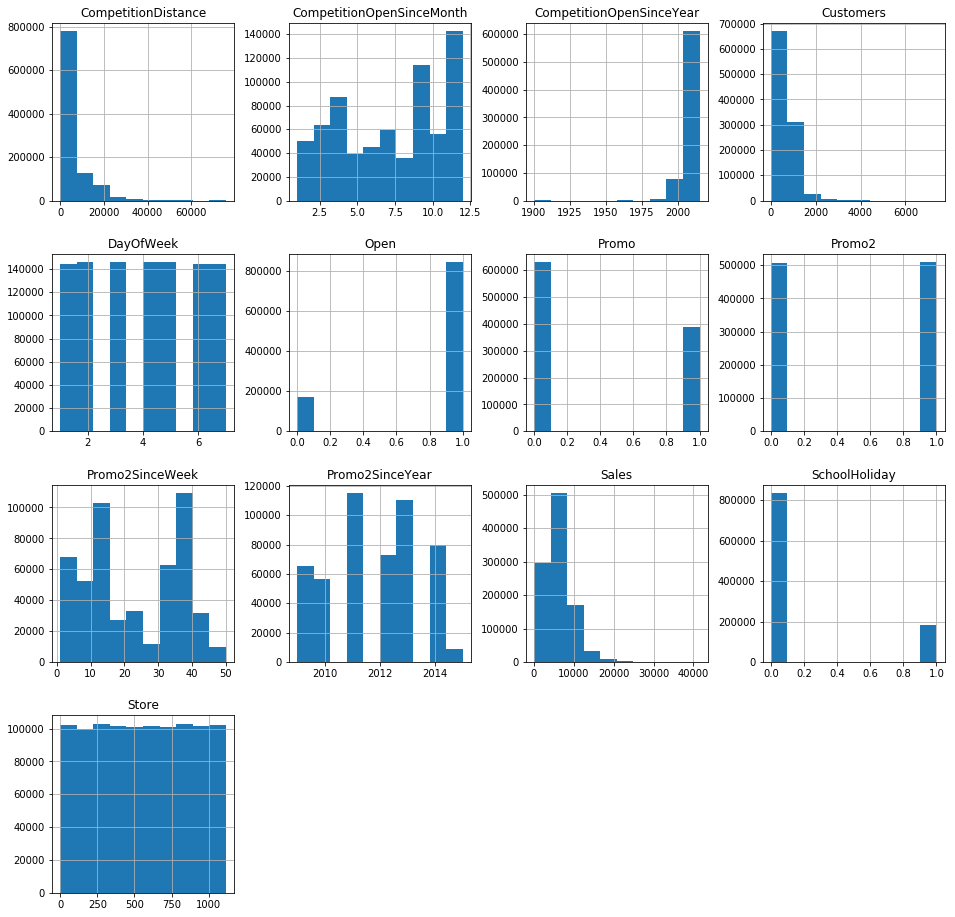

In [14]:
_ = interm_data.hist(column=continuous_vars, figsize = (16,16))


# Visualizing Distribution of Categorical Variables


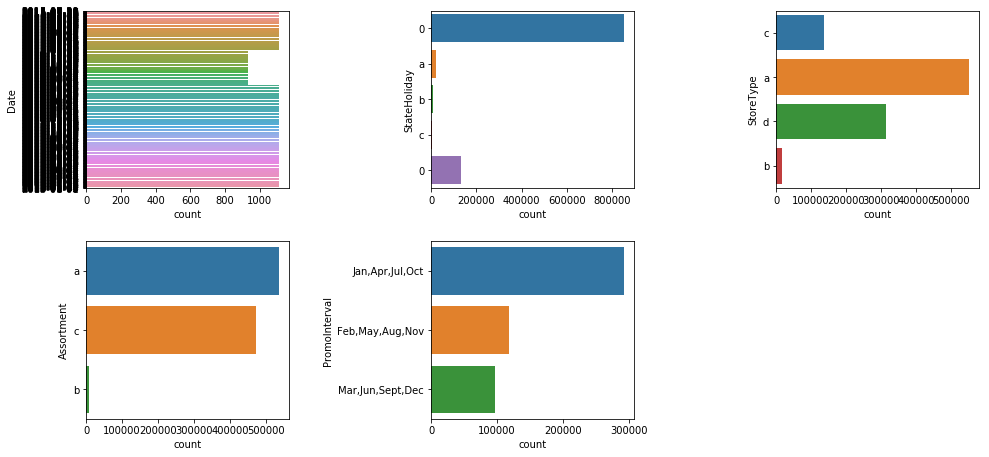

In [15]:
# Count plots of categorical variables

fig, axes = plt.subplots(4, 3, figsize=(16, 16))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)

for i, ax in enumerate(axes.ravel()):
    if i > 4:
        ax.set_visible(False)
        continue
    sns.countplot(y = categorical_vars[i], data=interm_data, ax=ax)

# Plot correlation heat map


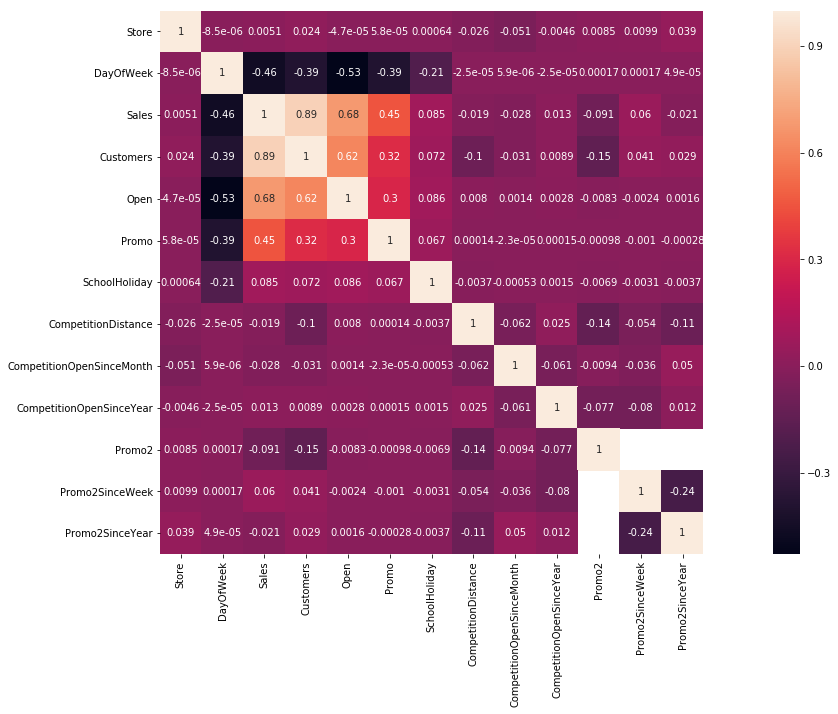

In [16]:
correlation = interm_data.corr(method='pearson')
plt.figure(figsize=(25,10))
sns.heatmap(correlation, vmax=1, square=True,  annot=True ) 
plt.show()

### Overall sales per Storetype

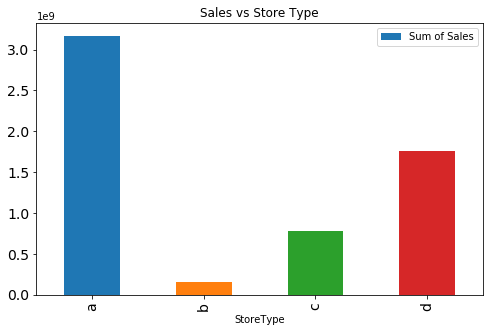

In [17]:
interm_data.groupby('StoreType').sum()[['Sales']].reset_index().rename(
    columns={'Sales': 'Sum of Sales'}).plot.bar(
    x='StoreType', y='Sum of Sales', figsize=(8, 5), fontsize=14, title = 'Sales vs Store Type');

__Comments__: Most of the sales come from stores of type "a"

### Overall sales per assortment 

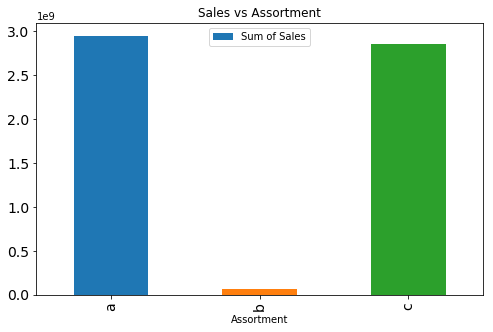

In [18]:
interm_data.groupby('Assortment').sum()[['Sales']].reset_index().rename(
    columns={'Sales': 'Sum of Sales'}).plot.bar(
    x='Assortment', y='Sum of Sales', figsize=(8, 5), fontsize=14, title = 'Sales vs Assortment');

__Comments__: The store assortment level 'b' (a = basic, b = extra, c = extended) is clearly minority, while the levels 'a' and 'c' are bring almost the same amount of sales. 

### Show overall sales and #customers per day of week 

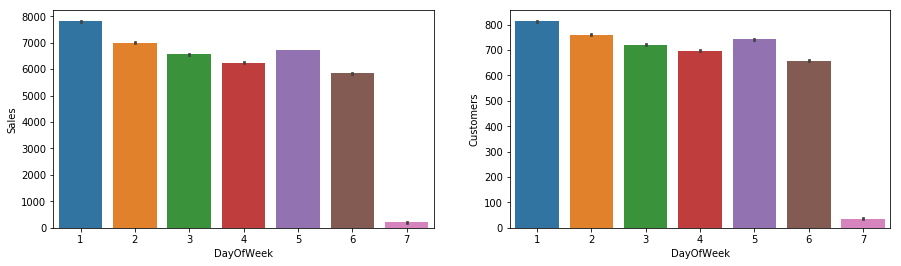

In [19]:
# DayOfWeek
# In both cases where the store is closed and opened

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='DayOfWeek', y='Sales', data=interm_data, order=[1,2,3,4,5,6,7], ax=axis1)
sns.barplot(x='DayOfWeek', y='Customers', data=interm_data, order=[1,2,3,4,5,6,7], ax=axis2)

### Plot sales values 

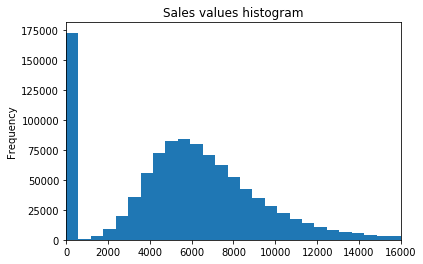

In [20]:

# Values with 0 is mostly because the store was closed
interm_data["Sales"].plot(kind='hist',bins=70,xlim=(0,16000), title = 'Sales values histogram')

In [21]:
# add new columns for the month
interm_data.Date = interm_data.Date.apply(lambda x : datetime.strptime(x, '%Y-%m-%d') )
interm_data['Month'] = interm_data.Date.apply(lambda x : x.month)

In [22]:
interm_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Month'],
      dtype='object')

### sales trends


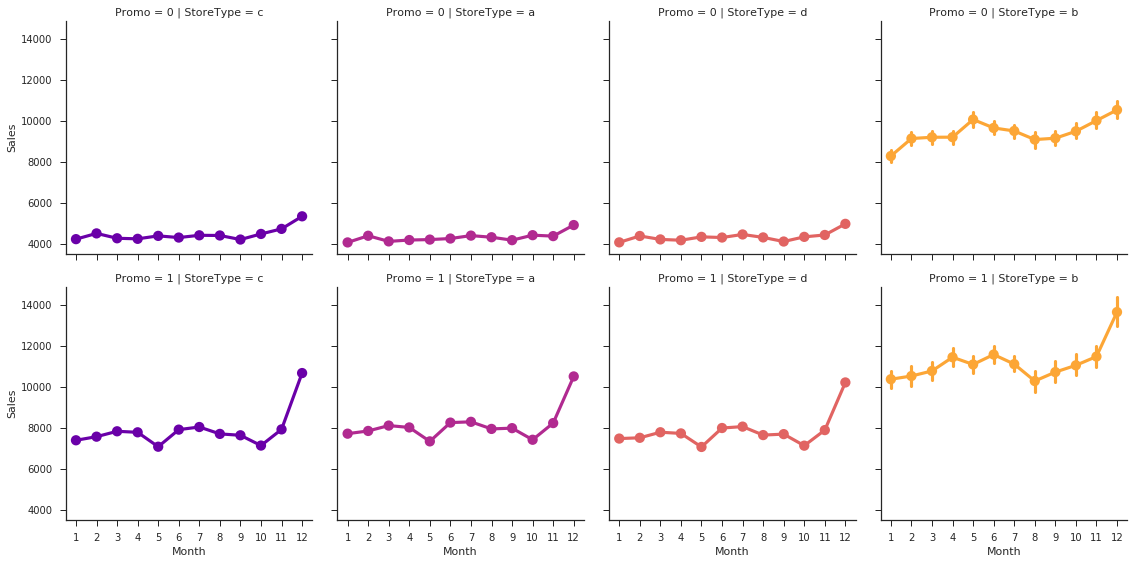

In [23]:
sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))

sns.factorplot(data = interm_data, x = 'Month', y = "Sales", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = c) 

__Comments__: 
- These plots shows the sales trend over the months, for each store type, when they are running a promotion (second row, promo = 0) or not (first row, promo = 1). 
- We can see that the sales are clearly boosted when the store is running a promotion (the sales almost double). We can see though that the impact of the pormotion is less not noticeable for store type 'b', which already had significantly higher sales than the other store types. 
- Finally, we can also notice the improvement of the sales at the end of the year. This improvment is even more noticieable when there are promotions running: the promotion campains are more efficient at the end of the year. 

## Basique approach : Averaging the sales

In [24]:
simple_average = interm_data[['Store', 'Sales']].groupby('Store').mean().reset_index()
simple_average.columns = ('Store', 'Sales')
simple_average.head()

,Store,Sales
0,1,3945.704883
1,2,4122.991507
2,3,5741.253715
3,4,8021.769639
4,5,3867.110403


In [25]:
test_set = pd.read_csv('test.csv')
submission = pd.merge(test_set, simple_average, on = 'Store')
submission.index += 1 
submission = submission[ 'Sales'].fillna(0).reset_index()
submission.columns = ('Id', 'Sales')
submission.to_csv('submission.csv', index =False)
submission.head()

,Id,Sales
0,1,3945.704883
1,2,3945.704883
2,3,3945.704883
3,4,3945.704883
4,5,3945.704883


#### Kaggle submission: 
We tried a simple way to predict the sales: by doing to global average per store. Out __score on Kaggle__ with this method is of __0.51__, which is quite poor, considering that the best score is about 0.1.
Thus, it might be justified to try Machine Learning approach. 

## Cleaning store dataset

We verify that there is not some blank in our data in order to make our algorithm work. 

In [26]:
set(list(store_data[store_data["Promo2"]==1]["Promo2SinceYear"].isna()))

{False}

In [27]:
set(list(store_data[store_data["Promo2"]==1]["Promo2SinceWeek"].isna()))

{False}

In [28]:
set(list(store_data[store_data["Promo2"]==1]["PromoInterval"].isna()))

{False}

For the variables "Promo2SinceWeek", "Promo2SinceYear" and "PromoInterval", we decide to fill the blank with a 0 because it means that there is not any promotion on this day.

In [29]:
store_data["Promo2SinceWeek"].fillna(0, inplace=True)

In [30]:
store_data["Promo2SinceYear"].fillna(0, inplace=True)

In [31]:
store_data["PromoInterval"].fillna(0, inplace=True)

In [32]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [33]:
petit_store_data = pd.get_dummies(store_data.iloc[:, :9])

In [34]:
petit_store_data.head()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,1270.0,9.0,2008.0,0,0.0,0.0,0,0,1,0,1,0,0
1,2,570.0,11.0,2007.0,1,13.0,2010.0,1,0,0,0,1,0,0
2,3,14130.0,12.0,2006.0,1,14.0,2011.0,1,0,0,0,1,0,0
3,4,620.0,9.0,2009.0,0,0.0,0.0,0,0,1,0,0,0,1
4,5,29910.0,4.0,2015.0,0,0.0,0.0,1,0,0,0,1,0,0


### Fill missing data with averaged value using KNN

We have to fill the NA to make our algorithm work. We decided to use the KNN algorithm to fill the blank. 
This algorithm will find the 5 nearest neighbor of the data where there is a NA and will fill the NA with the mean value of the neighborhood.

In [35]:
X_filled_KNN = KNN(k=5).complete(petit_store_data)

Imputing row 1/1115 with 0 missing, elapsed time: 0.204
Imputing row 101/1115 with 2 missing, elapsed time: 0.206
Imputing row 201/1115 with 2 missing, elapsed time: 0.208
Imputing row 301/1115 with 0 missing, elapsed time: 0.209
Imputing row 401/1115 with 0 missing, elapsed time: 0.211
Imputing row 501/1115 with 0 missing, elapsed time: 0.213
Imputing row 601/1115 with 0 missing, elapsed time: 0.215
Imputing row 701/1115 with 0 missing, elapsed time: 0.216
Imputing row 801/1115 with 0 missing, elapsed time: 0.217
Imputing row 901/1115 with 0 missing, elapsed time: 0.219
Imputing row 1001/1115 with 2 missing, elapsed time: 0.221
Imputing row 1101/1115 with 0 missing, elapsed time: 0.223


In [36]:
filled_petit_store_data = pd.DataFrame(X_filled_KNN, index = petit_store_data.index, columns = petit_store_data.columns)

In [37]:
pd.DataFrame(X_filled_KNN, index = petit_store_data.index, columns = petit_store_data.columns).isna().sum()

Store                        0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
StoreType_a                  0
StoreType_b                  0
StoreType_c                  0
StoreType_d                  0
Assortment_a                 0
Assortment_b                 0
Assortment_c                 0
dtype: int64

In [38]:
filled_petit_store_data["PromoInterval"] = store_data["PromoInterval"]

In [39]:
cleaned_store_data = filled_petit_store_data

In [40]:
cleaned_store_data.head()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,PromoInterval
0,1.0,1270.0,9.0,2008.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
1,2.0,570.0,11.0,2007.0,1.0,13.0,2010.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,"Jan,Apr,Jul,Oct"
2,3.0,14130.0,12.0,2006.0,1.0,14.0,2011.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,"Jan,Apr,Jul,Oct"
3,4.0,620.0,9.0,2009.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
4,5.0,29910.0,4.0,2015.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [41]:
total_data = pd.merge(data, cleaned_store_data, on="Store")

In [42]:
# add new columns for day, month, year

total_data.Date = total_data.Date.apply(lambda x : datetime.strptime(x, '%Y-%m-%d') )
total_data['Month'] = total_data.Date.apply(lambda x : x.month)
total_data['Day'] = total_data.Date.apply(lambda x : x.day)
total_data['Year'] = total_data.Date.apply(lambda x : x.year)

In [43]:
total_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c', 'PromoInterval', 'Month', 'Day', 'Year'],
      dtype='object')

In [44]:
total_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,PromoInterval,Month,Day,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,1270.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0,7,31,2015
1,1,4,2015-07-30,5020,546,1,1,0,1,1270.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0,7,30,2015
2,1,3,2015-07-29,4782,523,1,1,0,1,1270.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0,7,29,2015
3,1,2,2015-07-28,5011,560,1,1,0,1,1270.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0,7,28,2015
4,1,1,2015-07-27,6102,612,1,1,0,1,1270.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0,7,27,2015


### Standardization

We decided to use two methods to normalize our data

In [45]:
toScale = ['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']

In [46]:
total_data_std = pd.DataFrame.copy(total_data)
for i in toScale:
    total_data_std[i] = (total_data_std[i] - total_data_std[i].mean()) / (np.std(total_data_std[i]))
total_data_std.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,PromoInterval,Month,Day,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,-0.539636,...,0.0,1.0,0.0,1.0,0.0,0.0,0,7,31,2015
1,1,4,2015-07-30,5020,546,1,1,0,1,-0.539636,...,0.0,1.0,0.0,1.0,0.0,0.0,0,7,30,2015
2,1,3,2015-07-29,4782,523,1,1,0,1,-0.539636,...,0.0,1.0,0.0,1.0,0.0,0.0,0,7,29,2015
3,1,2,2015-07-28,5011,560,1,1,0,1,-0.539636,...,0.0,1.0,0.0,1.0,0.0,0.0,0,7,28,2015
4,1,1,2015-07-27,6102,612,1,1,0,1,-0.539636,...,0.0,1.0,0.0,1.0,0.0,0.0,0,7,27,2015


### Normalization

In [47]:
total_data_norm = pd.DataFrame.copy(total_data)

for i in toScale:
    total_data_norm[i] = (total_data_norm[i] - total_data_norm[i].min()) / (total_data_norm[i].max() - total_data_norm[i].min())
total_data_norm.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,PromoInterval,Month,Day,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,0.016482,...,0.0,1.0,0.0,1.0,0.0,0.0,0,7,31,2015
1,1,4,2015-07-30,5020,546,1,1,0,1,0.016482,...,0.0,1.0,0.0,1.0,0.0,0.0,0,7,30,2015
2,1,3,2015-07-29,4782,523,1,1,0,1,0.016482,...,0.0,1.0,0.0,1.0,0.0,0.0,0,7,29,2015
3,1,2,2015-07-28,5011,560,1,1,0,1,0.016482,...,0.0,1.0,0.0,1.0,0.0,0.0,0,7,28,2015
4,1,1,2015-07-27,6102,612,1,1,0,1,0.016482,...,0.0,1.0,0.0,1.0,0.0,0.0,0,7,27,2015


## Feature Engineering

In this part we considered the normalized dataset and added several features to our dataset.

In [48]:
#We create a copy of our normalized dataset
data_eng = total_data_norm.copy()

#### List of features

- __Index__ - an Id that represents a (Store, Date) duple within the test set
- __Store__ - a unique Id for each store
- __DayOfWeek__ - 1: Monday, 2: Tuesday, .... 7: Sunday
- __Date__ - 
- __Sales__ - the turnover for any given day (this is what you are predicting)
- __Customers__ - the number of customers on a given day
- __Open__ - an indicator for whether the store was open: 0 = closed, 1 = open
- __Promo__ - indicates whether a store is running a promo on that day
- __StateHoliday__ - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
- __SchoolHoliday__ - indicates if the (Store, Date) was affected by the closure of public schools
- __CompetitionDistance__ - distance in meters to the nearest competitor store (normalized)
- __Promo2__ - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
- __Promo2Since[Year/Week]__ - describes the year and calendar week when the store started participating in Promo2
- __StoreType_a, b, c, d__ - 0 or 1, whether the store is of type a, b, c, d
- __Assortment_a, b, c__ - describes an assortment level: a = basic, b = extra, c = extended, 0 or 1 in the corresponding column
- __PromoInterval__ - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store
- __Month__
- __Day__
- __Year__
- __Stores_average__ - Average sales per stores , on the whole dataset
- __ratio__ - Sales / number of customers
- __CompetitionOpenSince[Month/Year]__ - gives the approximate year and month of the time the nearest competitor was opened
- __MonthsCompetition__ - Number of Months in competition
- __Previous_Quarter_Sales_avg_store__ -  average sales per store for the previous quarter
- __Previous_Quarter_Sales_total_store__ -  average sales for all the stores for the previous quarter 
- __ratio_prev_q__ - Sales / number of customers for the previous quarter
- __Previous_Month_Sales_avg_store__ -  average sales per store for the previous month
- __Previous_Month_Sales_total_store__ -  average sales for all the stores for the previous month
- __ratio_prev_m__ - Sales / number of customers for the previous month
- __Stores_average_per_day__ - Average sales per store per day of week 

#### First feature : Store average sales over the whole period

In [49]:
# add column : store average
stores_average = data_eng[['Store', 'Sales']].groupby('Store').mean().reset_index()
stores_average.columns = ['Store', 'Stores_average']
data_eng = pd.merge(total_data_norm, stores_average , on = "Store" )

#### Second feature : Sales per customer ratio

In [50]:
# add column : sales per customers ratio
sales_customers_ratio = data_eng[["Year", 'Store', 'Sales', 'Month', 'Customers']].groupby(('Store', "Year", 'Month')).mean().reset_index()

sales_customers_ratio['ratio'] = sales_customers_ratio['Sales'] / sales_customers_ratio['Customers']

sales_customers_ratio = sales_customers_ratio.drop(['Sales'], axis = 1)
sales_customers_ratio = sales_customers_ratio.drop(['Customers'], axis = 1)
sales_customers_ratio.head()

data_eng = pd.merge(data_eng, sales_customers_ratio , on = ["Store", "Year", "Month"])

#### Third feature : Average open stores

In [51]:
# add column : average open stores
open_stores = data_eng[["Date","Store"]].groupby('Date').count().reset_index()
open_stores["avg_open_stores"] = open_stores["Store"]/1115.
open_stores.drop(["Store"],axis=1, inplace = True)
data_eng = pd.merge(data_eng, open_stores , on = ["Date"])

#### Fourth feature : Number of Months in competition

In [52]:
## add column : months in competition 
data_eng.drop(["CompetitionOpenSinceMonth","CompetitionOpenSinceYear"], axis = 1, inplace=True )
copy_cleaned_store_data = cleaned_store_data[["Store","CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"]].copy()
data_eng = pd.merge(data_eng, copy_cleaned_store_data, on="Store")
data_eng["MonthsCompetition"] = data_eng["Month"] - data_eng["CompetitionOpenSinceMonth"] + 12 * (- data_eng["CompetitionOpenSinceYear"] + data_eng["Year"])
data_eng.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,...,PromoInterval,Month,Day,Year,Stores_average,ratio,avg_open_stores,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,MonthsCompetition
0,1,5,2015-07-31,5263,555,1,1,0,1,0.016482,...,0,7,31,2015,3945.704883,8.647034,1.0,9.0,2008.0,82.0
1,1,4,2015-07-30,5020,546,1,1,0,1,0.016482,...,0,7,30,2015,3945.704883,8.647034,1.0,9.0,2008.0,82.0
2,1,3,2015-07-29,4782,523,1,1,0,1,0.016482,...,0,7,29,2015,3945.704883,8.647034,1.0,9.0,2008.0,82.0
3,1,2,2015-07-28,5011,560,1,1,0,1,0.016482,...,0,7,28,2015,3945.704883,8.647034,1.0,9.0,2008.0,82.0
4,1,1,2015-07-27,6102,612,1,1,0,1,0.016482,...,0,7,27,2015,3945.704883,8.647034,1.0,9.0,2008.0,82.0


#### Fifth set of features (previous quarter): Average sales per store, Total sales per store, sales per customer ratio 

In [53]:
## add column : previous quarter average sales per store + previous quarter total sales per store + sales_customer ratio previous quarter
data_eng["current_quarter"] = (data_eng["Month"]-0.5)//3+1
data_eng["previous_quarter"] = (data_eng["current_quarter"]-1)
data_eng["previous_quarter"].replace({0:4})
previous_quart_sales_avg = data_eng.groupby(["Year", 'Store', "previous_quarter"])["Sales"].mean().reset_index()
previous_quart_sales_avg.rename(columns={'Sales': 'Previous_Quarter_Sales_avg_store'}, inplace=True)
previous_quart_sales_total = data_eng.groupby(["Year", 'Store', "previous_quarter"])["Sales"].sum().reset_index()
previous_quart_sales_total.rename(columns = {"Sales": "Previous_Quarter_Sales_total_store"}, inplace = True)
data_eng = pd.merge(data_eng, previous_quart_sales_avg , on = ["Year", 'Store', "previous_quarter"])
data_eng = pd.merge(data_eng, previous_quart_sales_total , on = ["Year", 'Store', "previous_quarter"])
sales_customers_ratio_prev_q = data_eng[["Year",'Store', 'Sales', 'previous_quarter', 'Customers']].groupby(('Store', "Year", 'previous_quarter')).mean().reset_index()
sales_customers_ratio_prev_q['ratio_prev_q'] = sales_customers_ratio_prev_q['Sales'] / sales_customers_ratio_prev_q['Customers']
sales_customers_ratio_prev_q = sales_customers_ratio_prev_q.drop(['Sales'], axis = 1)
sales_customers_ratio_prev_q = sales_customers_ratio_prev_q.drop(['Customers'], axis = 1)
data_eng = pd.merge(data_eng, sales_customers_ratio_prev_q , on = ["Store", "Year", "previous_quarter"])
data_eng.drop(["previous_quarter", "current_quarter"], inplace = True, axis = 1)

#### Sixth set of features (previous month): Average sales per store, Total sales per store, sales per customer ratio 

In [54]:
## add column : previous month average sales per store + previous month total sales per store + sales_customer ratio previous month
data_eng["previous_month"] = (data_eng["Month"]-1)
data_eng["previous_month"].replace({0:12})
previous_month_sales_avg = data_eng.groupby(["Year", 'Store', "previous_month"])["Sales"].mean().reset_index()
previous_month_sales_avg.rename(columns={'Sales': 'Previous_Month_Sales_avg_store'}, inplace=True)
previous_month_sales_total = data_eng.groupby(["Year", 'Store', "previous_month"])["Sales"].sum().reset_index()
previous_month_sales_total.rename(columns = {"Sales": "Previous_Month_Sales_total_store"}, inplace = True)
data_eng = pd.merge(data_eng, previous_month_sales_avg , on = ["Year", 'Store', "previous_month"])
data_eng = pd.merge(data_eng, previous_month_sales_total , on = ["Year", 'Store', "previous_month"])
sales_customers_ratio_prev_m = data_eng[["Year",'Store', 'Sales', 'previous_month', 'Customers']].groupby(('Store', "Year", 'previous_month')).mean().reset_index()
sales_customers_ratio_prev_m['ratio_prev_m'] = sales_customers_ratio_prev_m['Sales'] / sales_customers_ratio_prev_m['Customers']
sales_customers_ratio_prev_m = sales_customers_ratio_prev_m.drop(['Sales'], axis = 1)
sales_customers_ratio_prev_m = sales_customers_ratio_prev_m.drop(['Customers'], axis = 1)
data_eng = pd.merge(data_eng, sales_customers_ratio_prev_m , on = ["Store", "Year", "previous_month"])
data_eng.drop(["previous_month"], inplace = True, axis = 1)

#### Seventh set of features : Average sales per store per day

In [55]:
stores_average_per_day = data_eng[["DayOfWeek",'Store', 'Sales']].groupby(('Store', "DayOfWeek")).mean().reset_index()
stores_average_per_day.columns = ['Store', "DayOfWeek" ,'Stores_average_per_day']
data_eng = pd.merge(data_eng, stores_average_per_day , on = ["Store", "DayOfWeek"] )

In [56]:
data_eng.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,MonthsCompetition,Previous_Quarter_Sales_avg_store,Previous_Quarter_Sales_total_store,ratio_prev_q,Previous_Month_Sales_avg_store,Previous_Month_Sales_total_store,ratio_prev_m,Stores_average_per_day
0,1,5,2015-07-31,5263,555,1,1,0,1,0.016482,...,9.0,2008.0,82.0,3911.806452,121266,8.647034,3911.806452,121266,8.647034,4516.414815
1,1,5,2015-07-24,3706,459,1,0,0,0,0.016482,...,9.0,2008.0,82.0,3911.806452,121266,8.647034,3911.806452,121266,8.647034,4516.414815
2,1,5,2015-07-17,4852,519,1,1,0,0,0.016482,...,9.0,2008.0,82.0,3911.806452,121266,8.647034,3911.806452,121266,8.647034,4516.414815
3,1,5,2015-07-10,3808,449,1,0,0,0,0.016482,...,9.0,2008.0,82.0,3911.806452,121266,8.647034,3911.806452,121266,8.647034,4516.414815
4,1,5,2015-07-03,4665,538,1,1,0,0,0.016482,...,9.0,2008.0,82.0,3911.806452,121266,8.647034,3911.806452,121266,8.647034,4516.414815


In [57]:
data_eng.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'CompetitionDistance', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c', 'PromoInterval', 'Month', 'Day', 'Year',
       'Stores_average', 'ratio', 'avg_open_stores',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
       'MonthsCompetition', 'Previous_Quarter_Sales_avg_store',
       'Previous_Quarter_Sales_total_store', 'ratio_prev_q',
       'Previous_Month_Sales_avg_store', 'Previous_Month_Sales_total_store',
       'ratio_prev_m', 'Stores_average_per_day'],
      dtype='object')

### One Hot Encoding

In order to use categorical variables, they need to be transformed first into dummy variables using one hot encoding

In [58]:
data_eng["StateHoliday"] = data_eng["StateHoliday"].astype(str)

In [59]:
# Hot encoding for categorical features
def hot_encoding(column_name, df):
    dummies = pd.get_dummies(df[column_name], prefix=column_name)
    df = pd.concat([df, dummies], axis =1)
    df = df.drop(column_name, axis = 1)
    return df

In [60]:
total_data_hot = hot_encoding(column_name='Month', df=data_eng) # Hot Encoding for Months
total_data_hot = hot_encoding(column_name='Day', df=total_data_hot)# Hot Encoding for Day
total_data_hot = hot_encoding(column_name='Year', df=total_data_hot) # Hot Encoding for Year
total_data_hot = hot_encoding(column_name='StateHoliday', df=total_data_hot) # Hot Encoding for StateHoliday
total_data_hot = hot_encoding(column_name='PromoInterval', df=total_data_hot) # Hot Encoding for PromoInterval

In [61]:
print(total_data_hot.shape)
total_data_hot.head()

(1017209, 86)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,...,Year_2014,Year_2015,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,1,0.016482,0.0,...,0,1,1,0,0,0,1,0,0,0
1,1,5,2015-07-24,3706,459,1,0,0,0.016482,0.0,...,0,1,1,0,0,0,1,0,0,0
2,1,5,2015-07-17,4852,519,1,1,0,0.016482,0.0,...,0,1,1,0,0,0,1,0,0,0
3,1,5,2015-07-10,3808,449,1,0,0,0.016482,0.0,...,0,1,1,0,0,0,1,0,0,0
4,1,5,2015-07-03,4665,538,1,1,0,0.016482,0.0,...,0,1,1,0,0,0,1,0,0,0


In [62]:
total_data_hot.fillna(0, inplace = True)

### Closed Stores
- We decided to remove from the dataset the stores that was closed and for which the sales was equal to 0 since what we aim to predict are the sales, and we do not want our model to be biased by sales equal to 0. 
- There're 172817 closed stores in the data. It is about 10% of the total amount of observations. To avoid any biased forecasts we will drop these values.

In [63]:
print(len(total_data_hot))
# closed stores

print(len(total_data_hot[(total_data_hot.Open == 0) & (total_data_hot.Sales == 0) ]))
total_data_hot[(total_data_hot.Open == 0) & (total_data_hot.Sales == 0) ].head()

1017209
172817


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,...,Year_2014,Year_2015,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
13,1,5,2015-05-01,0,0,0,1,0,0.016482,0.0,...,0,1,0,1,0,0,1,0,0,0
17,1,5,2015-04-03,0,0,0,1,1,0.016482,0.0,...,0,1,0,0,1,0,1,0,0,0
31,1,5,2014-12-26,0,0,0,0,1,0.016482,0.0,...,1,0,0,0,0,1,1,0,0,0
43,1,5,2014-10-03,0,0,0,1,0,0.016482,0.0,...,1,0,0,1,0,0,1,0,0,0
67,1,5,2014-04-18,0,0,0,1,1,0.016482,0.0,...,1,0,0,0,1,0,1,0,0,0


In [64]:
# opened stores with zero sales
zero_sales = total_data_hot[(total_data_hot.Open == 0) & (total_data_hot.Sales == 0)]
print("In total: ", zero_sales.shape[0], "lines")
zero_sales.head(5)

In total:  172817 lines


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,...,Year_2014,Year_2015,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
13,1,5,2015-05-01,0,0,0,1,0,0.016482,0.0,...,0,1,0,1,0,0,1,0,0,0
17,1,5,2015-04-03,0,0,0,1,1,0.016482,0.0,...,0,1,0,0,1,0,1,0,0,0
31,1,5,2014-12-26,0,0,0,0,1,0.016482,0.0,...,1,0,0,0,0,1,1,0,0,0
43,1,5,2014-10-03,0,0,0,1,0,0.016482,0.0,...,1,0,0,1,0,0,1,0,0,0
67,1,5,2014-04-18,0,0,0,1,1,0.016482,0.0,...,1,0,0,0,1,0,1,0,0,0


In [65]:
print("With closed stores:", total_data_hot.shape[0], "lines")
total_data_hot_closed = total_data_hot[(total_data_hot.Open != 0) & (total_data_hot.Sales != 0)]
print("Without closed stores:", total_data_hot_closed.shape[0], "lines")

With closed stores: 1017209 lines
Without closed stores: 844338 lines


In [66]:
total_data_hot_closed.dtypes

Store                                          int64
DayOfWeek                                      int64
Date                                  datetime64[ns]
Sales                                          int64
Customers                                      int64
Open                                           int64
Promo                                          int64
SchoolHoliday                                  int64
CompetitionDistance                          float64
Promo2                                       float64
Promo2SinceWeek                              float64
Promo2SinceYear                              float64
StoreType_a                                  float64
StoreType_b                                  float64
StoreType_c                                  float64
StoreType_d                                  float64
Assortment_a                                 float64
Assortment_b                                 float64
Assortment_c                                 f

## Times series

We will here consider the sales evolution as a time serie to see if there is a tendency or a periodicity.

The problem is that we have not one time serie but more than 1000 time series that correspond to the 1000 stores.

On the graph above, we aggregate the sales by day of the 1115 stores.

In [67]:
total_data_hot_closed.columns.values

array(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open',
       'Promo', 'SchoolHoliday', 'CompetitionDistance', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c', 'Stores_average', 'ratio', 'avg_open_stores',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
       'MonthsCompetition', 'Previous_Quarter_Sales_avg_store',
       'Previous_Quarter_Sales_total_store', 'ratio_prev_q',
       'Previous_Month_Sales_avg_store',
       'Previous_Month_Sales_total_store', 'ratio_prev_m',
       'Stores_average_per_day', 'Month_1', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Month_10', 'Month_11', 'Month_12', 'Day_1', 'Day_2', 'Day_3',
       'Day_4', 'Day_5', 'Day_6', 'Day_7', 'Day_8', 'Day_9', 'Day_10',
       'Day_11', 'Day_12', 'Day_13', 'Day_14', 'Day_15', 'Day_16',
       'Day_17', '

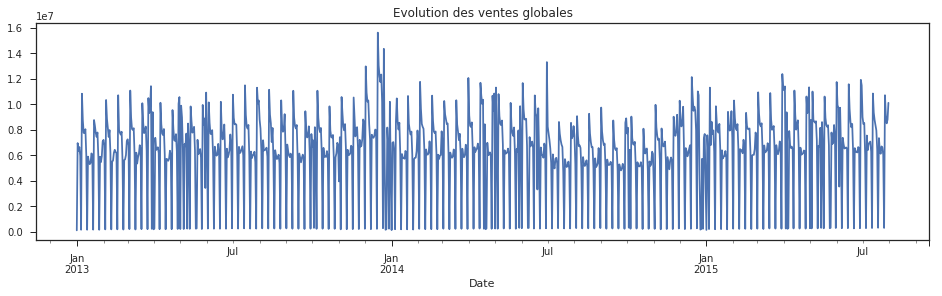

In [68]:
total_data_hot_closed.groupby("Date").Sales.sum().plot(figsize=(16,4), title = 'Evolution des ventes globales')

Just by observing this graph we do not see any tendency.

### Trend

In [69]:
from statsmodels.tsa.stattools import acf
ts = pd.DataFrame(total_data_hot_closed.groupby("Date").Sales.sum()) #on somme les ventes par jour

/home/dgallitelli/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


/home/dgallitelli/.local/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


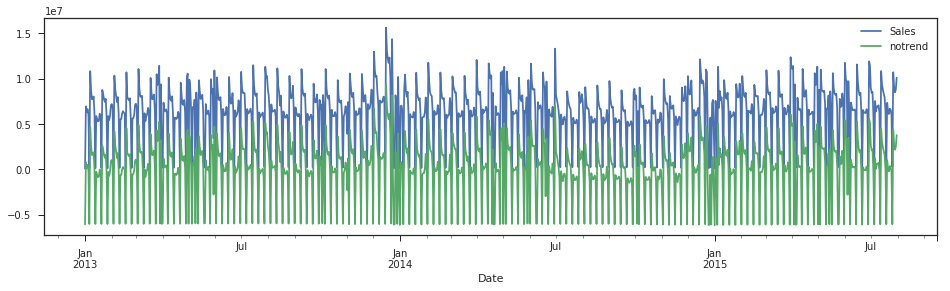

In [70]:
from statsmodels.tsa.tsatools import detrend
notrend = detrend(ts.Sales)
ts["notrend"] = notrend
ts.plot(y=["Sales", "notrend"], figsize=(16,4))

In [71]:
from statsmodels.api import OLS
import numpy
y = ts.Sales
X = numpy.ones((len(y), 2))
X[:,1] = numpy.arange(0,len(y))
reg = OLS(y,X)
results = reg.fit()
results.params

const    6.146276e+06
x1       1.881473e+02
dtype: float64

Our first hypothesys was true. Indeed, the coefficient of the linear regression is really close to zero, so there is not any tendency on this serie. The sales of the stores had been globally constant since 2013.

### Periodicity

To try to detect a periodicity, we observe the correlation coefficients of the serie:

In [72]:
from statsmodels.tsa.stattools import acf
cor = acf(ts.notrend)
cor

array([ 1.        , -0.02535481, -0.07094945,  0.02120014, -0.05669738,
       -0.18628316, -0.18085397,  0.54665774, -0.19122869, -0.22575064,
       -0.05948413, -0.02213379, -0.1200795 , -0.04358006,  0.73166582,
       -0.05610142, -0.09822508, -0.0121056 , -0.03767108, -0.15723761,
       -0.15643661,  0.58773368, -0.16332309, -0.17468286, -0.03723937,
       -0.01921992, -0.11903114, -0.09108321,  0.70408162, -0.08193027,
       -0.11475474, -0.03634906, -0.05101391, -0.15219919, -0.13974614,
        0.59104324, -0.1431626 , -0.17045094, -0.02687164, -0.02780676,
       -0.13801733])

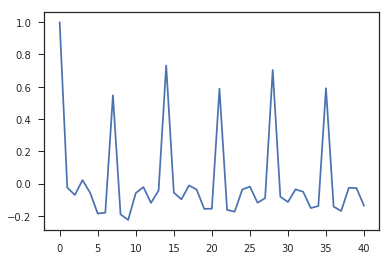

In [73]:
plt.plot(cor)

We can easily see on this graph that there is a periodicity of 7 days so, one week. We could be able to differenciate this time serie by 7 days to delete this periodicity. However, we have estimated that it is useless because the variable "Date" are used as explicative variables and so the model would be able to predict the true values.

This remark is true in the case of the periodicity but it would not have been true if there would had been a trend. Indeed, a increase in the sales can cause problems in a sens where our model have to predict some values it has not seen before.

### Feature Selection - PCA

In [74]:
total_data_hot_closed = total_data_hot_closed.drop('Date', axis = 1) # Drop the Date column

In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(total_data_hot_closed)
X = pca.transform(total_data_hot_closed)

In [76]:
pca.components_[:1]

array([[ 1.38383899e-05,  5.88687523e-08,  1.11012021e-02,
         1.45556385e-03, -0.00000000e+00, -1.70442767e-08,
        -3.86891498e-08, -1.75837870e-08, -3.91328752e-07,
        -5.97558503e-06, -7.87382505e-04, -5.61188564e-08,
         1.74567533e-07, -1.68313177e-08, -1.01617359e-07,
        -3.31794124e-07,  5.83179692e-08,  2.73476155e-07,
         9.28768683e-03, -4.46826206e-07, -2.84131034e-08,
        -5.74384806e-07,  1.04468176e-06, -1.33037249e-05,
         9.56597510e-03,  9.56368582e-01, -4.56806339e-07,
         9.58689645e-03,  2.91299471e-01, -4.46826206e-07,
         1.03971804e-02, -1.71867943e-08, -2.44169895e-08,
        -1.08997026e-08,  2.92198574e-09,  3.61798560e-09,
         4.03584795e-09, -2.19373454e-07,  2.47209656e-08,
         2.02068672e-08,  6.73438826e-08,  6.84996101e-08,
         8.05297954e-08,  4.48974823e-10, -8.36905232e-11,
        -3.11320497e-09, -9.12852204e-10,  8.13541334e-09,
        -7.81767847e-10, -2.31965720e-09, -1.72154887e-0

# ModelSet 
In this section we will test various models on our data on other the select the best one.  

We will measure the efficiency of the tested models with the Mean Square error. Since  we are in the case of a regression with continuous data, thus the MSE is more suitable.
We must also take into account the fact that our data are time series. Thus, we should not apply the usual KFold cross validation as we must take only anterior data as training data. Hence, we are using a TimeSeriesSplit in order to apply an appropriate cross validation.

### 1. Logistic regression

In a first place, we test the simplest model which is the logistic regression. 






In [77]:
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation as cv
from sklearn.model_selection import cross_val_score, cross_val_predict, TimeSeriesSplit

/home/dgallitelli/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [78]:
X = total_data_hot_closed.drop(['Sales'], axis=1).values
y = total_data_hot_closed.Sales.values
print("The training dataset has {} examples and {} features.".format(X.shape[0], X.shape[1]))

The training dataset has 844338 examples and 84 features.


In [79]:
tscv = TimeSeriesSplit(n_splits=4)  
TimeSeriesSplit(max_train_size=None, n_splits=3)
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [     0      1      2 ... 168867 168868 168869] TEST: [168870 168871 168872 ... 337734 337735 337736]
TRAIN: [     0      1      2 ... 337734 337735 337736] TEST: [337737 337738 337739 ... 506601 506602 506603]
TRAIN: [     0      1      2 ... 506601 506602 506603] TEST: [506604 506605 506606 ... 675468 675469 675470]
TRAIN: [     0      1      2 ... 675468 675469 675470] TEST: [675471 675472 675473 ... 844335 844336 844337]


In [80]:
lr = LinearRegression()
score = cross_val_score(lr, X, y, cv=TimeSeriesSplit(n_splits=4).split(X,y), scoring='neg_mean_squared_error')
print("Mean Square Error : ", -score.mean())

Mean Square Error :  989653.7743637839


NB : We add a minus sign in front of the MSE returned by cross_val_score because the MSE for this function is designed such that the output of this function can be used for maximization given some hyperparameters and thus returns a negative MSE.

#### Test the prediction on a store

Let's train the model on all the data and test the prediction on a randomly chosen store (We chose the store number 150).

In [81]:
#We remove the store 150 from the data and construct X_train and y_train
train = total_data_hot_closed[total_data_hot_closed.Store != 150]
X_train = train.drop(['Sales'], axis=1)
y_train = train.Sales

In [82]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [83]:
store_data_150 = total_data_hot_closed[total_data_hot_closed.Store == 150]
X_150 = store_data_150.drop(['Sales'], axis=1).values

In [84]:
y_pred = lr.predict(X_150)
#print(y_pred)

#### Visualize the prediction

Let's compare the shape of the predictions to the true values on the first 100 lines (in order to have a readable graph).

In [85]:
#The red dot on the prediction plot indicate the beginning of a week (it indicates the mondays).
DoW_150 = store_data_150.DayOfWeek.values.tolist()
markers_on_monday = [index for index, value in enumerate(DoW_150[:100]) if value == 1]

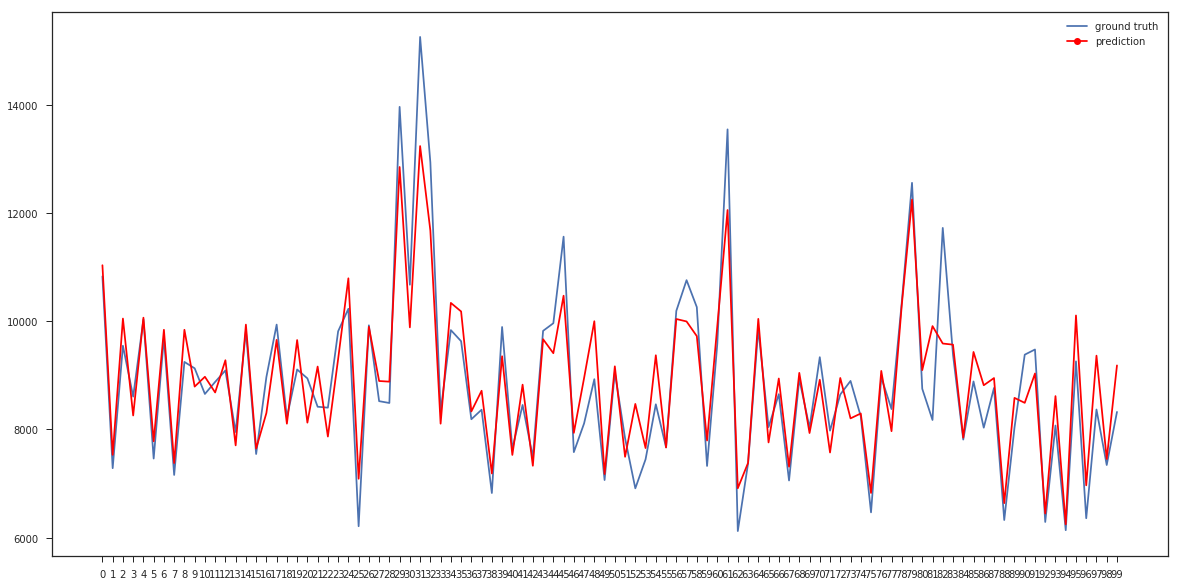

In [86]:
plt.figure(figsize=(20, 10))  # Set figsize to increase size of figure
plt.plot(store_data_150.Sales.values[:100], label="ground truth")
plt.plot(y_pred[:100], c='r', label="prediction", markevery=markers_on_monday, marker = 'o')
plt.xticks(np.arange(0, 100))
plt.legend()

#### Comments :
We can notice that we have already catch the shape of the true values but the predictions seem to be a little bit underestimated compared to the true values.We skipped other prediction method like linear regression,SVC regression and directly forwarded to ensemble learning methods, which has been proved to be the best among all other approaches in our assignment. The basic idea behind ensemble learning is like this: given the training data, ensemble learning uses multiple learning algorithms to find the best representative model for the specific amount of data. So the actual regressor method may be different for different bulk of data. The most representative ensemble learning method are the random forest tree and gradient boosting tree, the AdaBoost and the XGBoost.

### 2. Gradient Boosting Regressor Tests

In [87]:
from sklearn.ensemble import GradientBoostingRegressor
X_gbr = total_data_hot_closed.drop(['Sales'], axis=1).values
Y_gbr = total_data_hot_closed.Sales.values
gbr = GradientBoostingRegressor(criterion='mse')
score = cross_val_score(gbr, X_gbr, Y_gbr, cv=TimeSeriesSplit(n_splits=4).split(X_gbr,Y_gbr), scoring='neg_mean_squared_error')
print("Mean Square Error : ", -score.mean())

Mean Square Error :  480983.4040634704


Using the same toy store from before (=150), let's test this model.

In [88]:
train = total_data_hot_closed[total_data_hot_closed.Store != 150]
X_train = train.drop(['Sales'], axis=1)
y_train = train.Sales
store_data_150 = total_data_hot_closed[total_data_hot_closed.Store == 150]
X_150 = store_data_150.drop(['Sales'], axis=1).values
Y_150 = store_data_150.Sales.values

gbr.fit(X_train, y_train)
y_gbr_pred = gbr.predict(X_150)

In [89]:
#The red dot on the prediction plot indicate the beginning of a week (it indicates the mondays).
DoW_150 = store_data_150.DayOfWeek.values.tolist()
markers_on_monday = [index for index, value in enumerate(DoW_150[:100]) if value == 1]

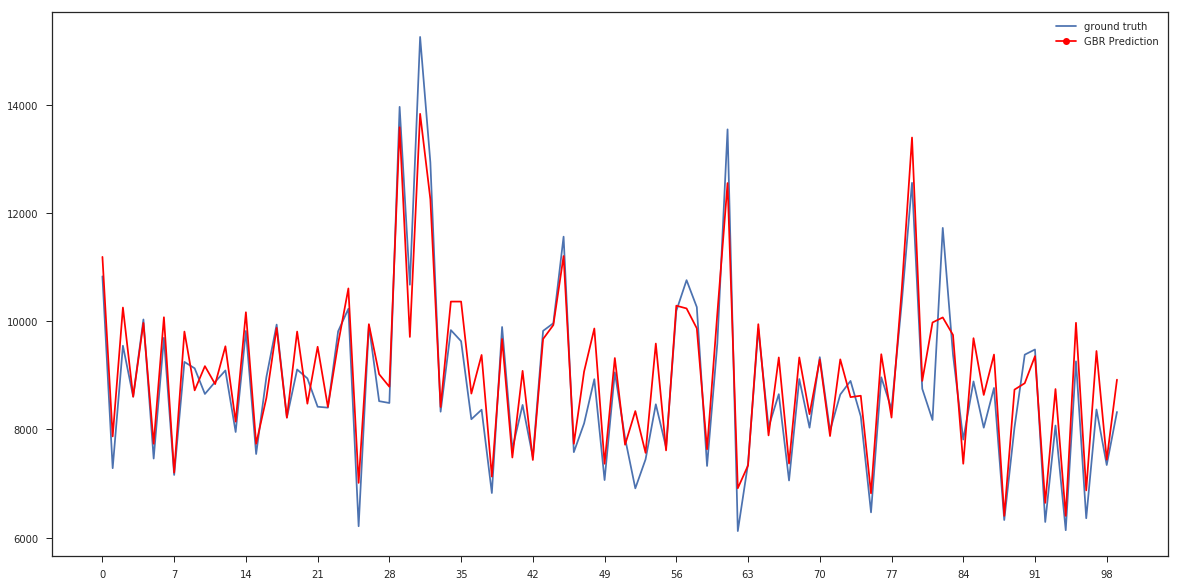

In [90]:
plt.figure(figsize=(20, 10))  # Set figsize to increase size of figure
plt.plot(store_data_150.Sales.values[:100], label="ground truth")
plt.plot(y_gbr_pred[:100], c='r', label="GBR Prediction", markevery=markers_on_monday, marker = 'o')
plt.xticks(np.arange(0, 100, 7.0))
plt.legend()

As you can see there has been a fairly substantial improvement of the predictions whith respect to  before but the results are still not satisfying . This is because  Gradient Boosting Tree has some drawbacks. First, It is more likely to overfit than random forest.It trusts every data point and tries to find optimal linear combination of trees given the train data. Second, there are more parameters in Gradient Boosting Tree. We have to tune the number of trees, maximum depth and the learning rate at the same time. For the first drawback, we can try to avoid overfitting by using the cross validation provided by sklearn. For the second method, we have to spend more time to tune it,
which is tradeoff between time and accuracy.

### 3. Random Forest Regressor

In [91]:
from sklearn.ensemble import RandomForestRegressor
X = total_data_hot_closed.drop(['Sales'], axis=1).values
Y = total_data_hot_closed.Sales.values
rfr = RandomForestRegressor(criterion='mse')
score = cross_val_score(rfr, X, Y, cv=TimeSeriesSplit(n_splits=4).split(X,Y), scoring='neg_mean_squared_error')
print("Mean Square Error : ", -score.mean())

Mean Square Error :  511949.3332623011


In [92]:
train = total_data_hot_closed[total_data_hot_closed.Store != 150]
X_train = train.drop(['Sales'], axis=1)
y_train = train.Sales
store_data_150 = total_data_hot_closed[total_data_hot_closed.Store == 150]
X_150 = store_data_150.drop(['Sales'], axis=1).values
Y_150 = store_data_150.Sales.values

rfr.fit(X_train, y_train)
y_rfr_pred = rfr.predict(X_150)

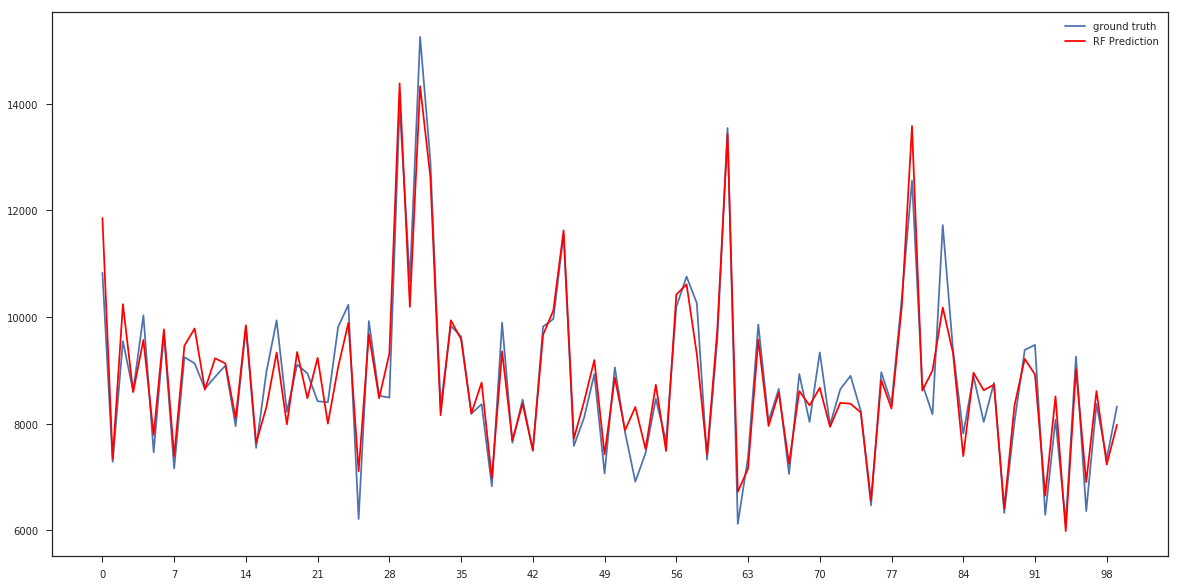

In [93]:
plt.figure(figsize=(20, 10))  # Set figsize to increase size of figure
plt.plot(store_data_150.Sales.values[:100], label="ground truth")
plt.plot(y_rfr_pred[:100], c='r', label="RF Prediction")
plt.xticks(np.arange(0, 100, 7.0))
plt.legend()

 Random Forest Tree is not enought good as the GBM.It  tries is to construct a multitude of decision trees. Then it classifies the data into the decision tree
node and for each node it calculate the mean value and use this value for prediction. Random forest tree uses random
amount of data for training. With this randomized data, it is hard for random forest tree to overfit. Therefore, it is much
more easier to tune the data compared to Gradient Boosting Tree.

###  4. AdaBoost of Linear Regression
Some algorithms can be improved thanks to Boosting techniques. The Linear Regression from before looks pretty promising, with a low MSE.

Can AdaBoost improve its performances?

In [94]:
from sklearn.ensemble import AdaBoostRegressor
adaLR = AdaBoostRegressor(LinearRegression())
score = cross_val_score(lr, X, y, cv=TimeSeriesSplit(n_splits=4).split(X,y), scoring='neg_mean_squared_error')
print("Mean Square Error : ", -score.mean())

Mean Square Error :  989653.7743637839


At a first glance, it doesn't look like so. The MSE value is still the same.

In [95]:
train = total_data_hot_closed[total_data_hot_closed.Store != 150]
X_train = train.drop(['Sales'], axis=1)
y_train = train.Sales
store_data_150 = total_data_hot_closed[total_data_hot_closed.Store == 150]
X_150 = store_data_150.drop(['Sales'], axis=1).values
Y_150 = store_data_150.Sales.values

adaLR.fit(X_train, y_train)
y_adalr_pred = adaLR.predict(X_150)

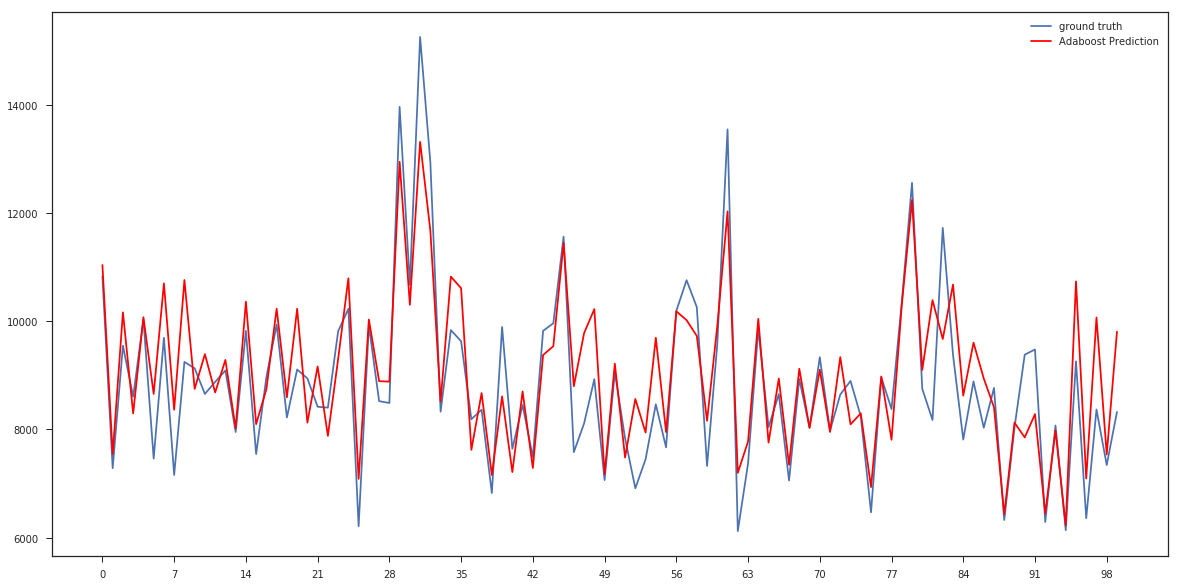

In [96]:
plt.figure(figsize=(20, 10))  # Set figsize to increase size of figure
plt.plot(store_data_150.Sales.values[:100], label="ground truth")
plt.plot(y_adalr_pred[:100], c='r', label="Adaboost Prediction")
plt.xticks(np.arange(0, 100, 7.0))
plt.legend()

This is probably the worse amount all the models :(

### One test, to rule them all.

In [97]:
train = total_data_hot_closed[total_data_hot_closed.Store != 150]
X_train = train.drop(['Sales'], axis=1)
y_train = train.Sales
store_data_150 = total_data_hot_closed[total_data_hot_closed.Store == 150]
X_150 = store_data_150.drop(['Sales'], axis=1).values
Y_150 = store_data_150.Sales.values

In [98]:
import time


lr = LinearRegression()
adalr = AdaBoostRegressor(LinearRegression())
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
classifiers = [lr, adalr, rfr, gbr]

from sklearn.metrics import mean_squared_error, r2_score
for cl in classifiers:
    print("### Generating metrics for the classifier " +str(cl).split("(")[0].upper())
    start = time.time()
    cl.fit(X_train, y_train)
    y_cl_pred = cl.predict(X_150)
    end = time.time()
    print("MSE : "+str(mean_squared_error(Y_150, y_cl_pred))
                  +" | R2 : "+str(r2_score(Y_150, y_cl_pred))
                  +" | Time elapsed: "+str(end-start))

### Generating metrics for the classifier LINEARREGRESSION
MSE : 629721.3953587281 | R2 : 0.8637815625058679 | Time elapsed: 9.048231840133667
### Generating metrics for the classifier ADABOOSTREGRESSOR
MSE : 914348.6751490331 | R2 : 0.8022122977373525 | Time elapsed: 311.17791295051575
### Generating metrics for the classifier RANDOMFORESTREGRESSOR
MSE : 189011.009247449 | R2 : 0.9591140073393735 | Time elapsed: 241.96466755867004
### Generating metrics for the classifier GRADIENTBOOSTINGREGRESSOR
MSE : 292261.29517324734 | R2 : 0.9367793801164528 | Time elapsed: 251.69795036315918


Time estimation does not work properly, a better way to show this value should be found.

The GBR takes much longer than the LR, but with a time comparable to the ADA and the RFR. However, its performances are **20% better** in terms of **R2 Score**, with **1/3** of the **MSE**.

## Working on the test set 

In order to test our model, we decided to compare our results on the test set to the ones of the Kaggle competition. We had to preprocess the test set as we did on the train set :

In [99]:
test_set = pd.read_csv("test.csv")
test_data = pd.merge(test_set, cleaned_store_data, on="Store")
test_data.Date = test_data.Date.apply(lambda x : datetime.strptime(x, '%Y-%m-%d') )
test_data['Month'] = test_data.Date.apply(lambda x : x.month)
test_data['Day'] = test_data.Date.apply(lambda x : x.day)
test_data['Year'] = test_data.Date.apply(lambda x : x.year)

In [100]:
pd.read_csv("test.csv")

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
5,6,10,4,2015-09-17,1.0,1,0,0
6,7,11,4,2015-09-17,1.0,1,0,0
7,8,12,4,2015-09-17,1.0,1,0,0
8,9,13,4,2015-09-17,1.0,1,0,0
9,10,14,4,2015-09-17,1.0,1,0,0


### Normalization

In [101]:
test_data_norm = pd.DataFrame.copy(test_data)

for i in ['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']:
    test_data_norm[i] = (test_data_norm[i] - test_data_norm[i].min()) / (test_data_norm[i].max() - test_data_norm[i].min())
test_data_norm.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,PromoInterval,Month,Day,Year
0,1,1,4,2015-09-17,1.0,1,0,0,0.016482,0.727273,...,0.0,1.0,0.0,1.0,0.0,0.0,0,9,17,2015
1,857,1,3,2015-09-16,1.0,1,0,0,0.016482,0.727273,...,0.0,1.0,0.0,1.0,0.0,0.0,0,9,16,2015
2,1713,1,2,2015-09-15,1.0,1,0,0,0.016482,0.727273,...,0.0,1.0,0.0,1.0,0.0,0.0,0,9,15,2015
3,2569,1,1,2015-09-14,1.0,1,0,0,0.016482,0.727273,...,0.0,1.0,0.0,1.0,0.0,0.0,0,9,14,2015
4,3425,1,7,2015-09-13,0.0,0,0,0,0.016482,0.727273,...,0.0,1.0,0.0,1.0,0.0,0.0,0,9,13,2015


### Adding the same features as on our train set

In [102]:
#We create a copy of our normalized dataset
test_eng = test_data_norm.copy()

In [103]:
### add feature store average

test_eng = pd.merge(test_eng, stores_average , on = "Store" )

In [104]:
### add feature sales customers ratio over whole period
sales_customers_ratio = data_eng[["Year", 'Store', 'Sales', 'Month', 'Customers']].groupby(('Store')).mean().reset_index()

sales_customers_ratio['ratio'] = sales_customers_ratio['Sales'] / sales_customers_ratio['Customers']

sales_customers_ratio = sales_customers_ratio.drop(['Sales'], axis = 1)
sales_customers_ratio = sales_customers_ratio.drop(['Customers'], axis = 1)

test_eng = pd.merge(test_eng, sales_customers_ratio[["Store","ratio"]] , on = ["Store"])


In [105]:
# add column : average open stores
open_stores_test = test_eng[["Date","Store"]].groupby('Date').count().reset_index()
open_stores_test["avg_open_stores"] = open_stores_test["Store"]/1115.
open_stores_test.drop(["Store"],axis=1, inplace = True)
test_eng = pd.merge(test_eng, open_stores_test , on = ["Date"])


In [106]:
## add column : months in competition 
test_eng.drop(["CompetitionOpenSinceMonth","CompetitionOpenSinceYear"], axis = 1, inplace=True )
copy_cleaned_store_data = cleaned_store_data[["Store","CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"]].copy()
test_eng = pd.merge(test_eng, copy_cleaned_store_data, on="Store")
test_eng["MonthsCompetition"] = test_eng["Month"] - test_eng["CompetitionOpenSinceMonth"] + 12 * (- test_eng["CompetitionOpenSinceYear"] + test_eng["Year"])
test_eng.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,...,PromoInterval,Month,Day,Year,Stores_average,ratio,avg_open_stores,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,MonthsCompetition
0,1,1,4,2015-09-17,1.0,1,0,0,0.016482,0.0,...,0,9,17,2015,3945.704883,8.437366,0.767713,9.0,2008.0,84.0
1,857,1,3,2015-09-16,1.0,1,0,0,0.016482,0.0,...,0,9,16,2015,3945.704883,8.437366,0.767713,9.0,2008.0,84.0
2,1713,1,2,2015-09-15,1.0,1,0,0,0.016482,0.0,...,0,9,15,2015,3945.704883,8.437366,0.767713,9.0,2008.0,84.0
3,2569,1,1,2015-09-14,1.0,1,0,0,0.016482,0.0,...,0,9,14,2015,3945.704883,8.437366,0.767713,9.0,2008.0,84.0
4,3425,1,7,2015-09-13,0.0,0,0,0,0.016482,0.0,...,0,9,13,2015,3945.704883,8.437366,0.767713,9.0,2008.0,84.0


In [107]:
### We use only the values of the last quarter since our test data lasts one month
previous_quart_sales_avg_last_quarter = previous_quart_sales_avg[(previous_quart_sales_avg["previous_quarter"]==2.0) & (previous_quart_sales_avg["Year"]==2015)][["Store", "Previous_Quarter_Sales_avg_store"]]
previous_quart_sales_total_last_quarter = previous_quart_sales_total[(previous_quart_sales_total["previous_quarter"]==2.0) & (previous_quart_sales_total["Year"]==2015)][["Store", "Previous_Quarter_Sales_total_store"]]
sales_customers_ratio_last_q = sales_customers_ratio_prev_q[(sales_customers_ratio_prev_q["previous_quarter"]==2.0) & (sales_customers_ratio_prev_q["Year"]==2015)][["Store", "ratio_prev_q"]]

In [108]:
test_eng = pd.merge(test_eng, previous_quart_sales_avg_last_quarter , on = ['Store'])
test_eng = pd.merge(test_eng, previous_quart_sales_total_last_quarter, on = ['Store'])
test_eng = pd.merge(test_eng, sales_customers_ratio_last_q, on = ["Store"])

In [109]:
### We use only the values of the last month since our test data lasts one month
previous_month_sales_avg_last_month = previous_month_sales_avg[(previous_month_sales_avg["previous_month"]==6) & (previous_month_sales_avg["Year"]==2015)][["Store", "Previous_Month_Sales_avg_store"]]
previous_month_sales_total_last_month = previous_month_sales_total[(previous_month_sales_total["previous_month"]==6) & (previous_month_sales_total["Year"]==2015)][["Store", "Previous_Month_Sales_total_store"]]
sales_customers_ratio_last_m = sales_customers_ratio_prev_m[(sales_customers_ratio_prev_m["previous_month"]==6) & (sales_customers_ratio_prev_m["Year"]==2015)][["Store", "ratio_prev_m"]]

In [110]:
test_eng = pd.merge(test_eng, previous_month_sales_avg_last_month , on = ['Store'])
test_eng = pd.merge(test_eng, previous_month_sales_total_last_month, on = ['Store'])
test_eng = pd.merge(test_eng, sales_customers_ratio_last_m, on = ["Store"])

In [111]:
test_eng = pd.merge(test_eng, stores_average_per_day , on = ["Store", "DayOfWeek"] )

#### Hot encoding on our test set with the same variables

In [112]:
def hot_encoding(column_name, df):
    dummies = pd.get_dummies(df[column_name], prefix = column_name)
    df = pd.concat([df, dummies], axis =1)
    df = df.drop(column_name, axis = 1)
    return df
    
test_data_hot = hot_encoding(column_name='Month', df=test_eng) # Hot Encoding for Months
test_data_hot = hot_encoding(column_name='Day', df=test_data_hot)# Hot Encoding for Day
test_data_hot = hot_encoding(column_name='Year', df=test_data_hot) # Hot Encoding for Year
test_data_hot = hot_encoding(column_name='StateHoliday', df=test_data_hot) # Hot Encoding for StateHoliday
#total_data_hot = hot_encoding(column_name='Store', df=data_eng) # Hot Encoding for StoreId
test_data_hot = hot_encoding(column_name='PromoInterval', df=test_data_hot) # Hot Encoding for PromoInterval

test_data_hot_closed = test_data_hot[(test_data_hot.Open != 0)]

In [113]:
### Filling missing columns 
import copy
list_columns = copy.deepcopy(list(total_data_hot.columns))
list_columns.remove("Customers")
list_columns.remove("Sales")

In [114]:
for column in list_columns : 
    if column not in list(test_data_hot.columns):
        test_data_hot[column] = 0

In [115]:
test_data_hot.set_index("Id", inplace = True)
test_data_hot.sort_index( inplace = True)

#### Gradient Boosting Regressor on the test set fit on all train set

In [116]:
from sklearn.ensemble import GradientBoostingRegressor
X_gbr_train = total_data_hot.drop(['Sales', "Customers", "Date"], axis=1).values
Y_gbr_train = total_data_hot.Sales.values
gbr = GradientBoostingRegressor(criterion='mse')

In [117]:
test_data_hot.fillna(0,inplace = True)

In [118]:
X_gbr_train.shape

(1017209, 83)

In [119]:
len(sorted((total_data_hot.columns)))

86

In [120]:
gbr.fit(X_gbr_train, Y_gbr_train)
y_cl_pred = gbr.predict(test_data_hot.drop(["Date"], axis=1).values)

#### Adapt output to Kaggle format

In [121]:
out_df = pd.DataFrame({"Sales":y_cl_pred, "id":list(test_data_hot.index), "Open":test_data_hot.Open })
out_df = out_df[["id", "Open", "Sales"]]

### We set closed stores sales to 0
out_df.loc[out_df[out_df["Open"]<=0].index,"Sales"] = 0
out_df.loc[out_df[out_df["Open"]==0].index,"Sales"] = 0

out_df = out_df[["id", "Sales"]]
out_df.to_csv("output_example.csv",  index = False)

#### Extreme Gradient Boosting Regressor on the test set fit on all train set

In [146]:
import xgboost

In [147]:
xgbr = xgboost.XGBRegressor()

In [148]:
xgbr.fit(X_gbr_train, Y_gbr_train)
y_xgb_pred = gbr.predict(test_data_hot.drop(["Date"], axis=1).values)

In [149]:
out_df_xgb = pd.DataFrame({"Sales":y_xgb_pred, "id":list(test_data_hot.index), "Open":test_data_hot.Open })
out_df_xgb = out_df_xgb[["id", "Open", "Sales"]]

### We set closed stores sales to 0
out_df_xgb.loc[out_df_xgb[out_df_xgb["Open"]<=0].index,"Sales"] = 0
out_df_xgb.loc[out_df_xgb[out_df_xgb["Open"]==0].index,"Sales"] = 0

out_df_xgb = out_df_xgb[["id", "Sales"]]
out_df_xgb.to_csv("output_example_xgb.csv",  index = False)

## Conclusion

Since time limited, we have no time to do too much further analysis on the dataset. However, we did some preliminary
work which may be useful for future work.
Firstly, we wanted to have a look at the Kaggle score without doing any Machine Learning. For that, we have just computed the mean of the sales by store as the prediction. We obtained an error of 0.51 on Kaggle, which is quite bad.
In fact, after all our work on the data and using the xgboost model , we obtained a score of 0.1559 on Kaggle, which is much better (we obtained the same result using gradient boosting regressor model). __Hence, it justifies the use of Machine Learning for our problem.__ 
#### Some possible improvements :
In order to improve our prediction, __we can enrich our data__. 
For instance, we can use meteorological data. In fact, we can  look if the sales are impacted by the weather or not.
We can also  look at the existence or not of a concurrent nearby each store (the distance of a concurrent to each store could have been a relevant feature). Maybe, it can bee useful to analyze the demography of the surrounding area of each store, for a deeper study.
We can also add, that the current economical context can also be taken into account for the predictions. In fact, we must not forget that the sales of the stores in general are also influenced by the current economical context, which could be an unknown parameter in the future.
In terms of model tuning, we can try to use an ensemble of xgboost in hopes that we will gain more in terms of accuracy. We can can also analyze deeper the features in other to select the appropriate set of features for our model. 

#### Some possible applications to our study :

Predicting the sales of each store can be very useful for the compagny.
Indeed, we can imagine applications such that :
- Adapting the human resources to the predicted sales.
- Adapting the investments for the stores which need them most.
- Closing some stores which won’t be sufficiently profitable in the future. 
- Better responding to customers needs and improving efficiency.

## Application: new store opening
Rossmann company is a company which has in mind the objective the spread more on the territory and reach everywhere in Europe. So, they must be intereseted in trying to predict whether opening a new store would actually prove to be a successful business move or not. Possibly after a field survey, the business department would like to know the forecasted sales of opening a new store with a certain set of characteristics. Let's suppose for example, that Rossmann would like to build a new shop somewhere in Europe, with an opening promotion. Predicting the sales is as easy as:

In [140]:
from collections import OrderedDict
# Store	StoreType	Assortment	CompetitionDistance	CompetitionOpenSinceMonth	CompetitionOpenSinceYear	Promo2	Promo2SinceWeek	Promo2SinceYear	PromoInterval

Store = 999 # whatever, doesn't matter
StoreType = 'a'
Assortment = 'a'
CompetitionDistance = 5000
CompetitionOpenSinceMonth = 7
CompetitionOpenSinceYear = 2015
Promo2 = 1
Promo2SinceWeek = 1
Promo2SinceYear = 2018
PromoInterval = "Jan,Apr,Jul,Oct"

newStore = OrderedDict( {'Store':Store, 'StoreType':StoreType, 'Assortment':Assortment, 'CompetitionDistance':CompetitionDistance, 'CompetitionOpenSinceMonth':CompetitionOpenSinceMonth,
            'CompetitionOpenSinceYear':CompetitionOpenSinceYear, 'Promo2':Promo2, 'Promo2SinceWeek':Promo2SinceWeek, 'Promo2SinceYear':Promo2SinceYear, 'PromoInterval':PromoInterval})

In [145]:
# Process these data to be used by the algorithm through some kind of pipeline
new_store = pd.DataFrame(newStore, index=[0])
new_store = pd.get_dummies(new_store.iloc[:, :9])
new_store.head()
# Predict the sales using the XGBOOST model
# TODO: how to predict with our model?
xgbr.predict(gbr.predict(new_store))

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_a,Assortment_a
0,999,5000,7,2015,1,1,2018,1,1


From these prediction, it is possible for the company to estimate whether it is worth it or not to open a store with these characteristics: it becomes then a game of testing the right parameters to obtain the desired results.